only four assay model needed to build
- heat shock response signalling agonist
- aryl hydrocarbon receptor agonist
- estrogen receptor alpha agonist
- pregnane x receptor agonist

# To do list 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [99]:
# mpl.style.available

In [3]:
mpl.style.use('seaborn-notebook')

# Dataset Loading

In [4]:
df_raw = pd.read_csv('data/Specs935_ImageMeans_AfterQC_AnnotatedWithMOA.csv', sep=';')
df_raw.rename(columns={'Compound ID':'Compound_ID'}, inplace = True)

In [5]:
display(df_raw)

,ImageID,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,...,Plate,Plate_Well,batch_id,pertType,cmpd_conc,Flag,Count_nuclei,Batch nr,Compound_ID,selected_mechanism
0,P03-L2_B03_1,1,64.536842,1,2467.273684,3451.578947,1148.673684,1053.315789,1089.421053,995.547368,...,03-L2,specs935-plate03-L2_B03,BJ1894547,trt,10.0,0,109.0,BJ1894547,CBK042132,estrogen receptor alpha modulator
1,P03-L2_B03_2,1,62.554455,2,2544.425743,3518.514851,1177.485149,986.623762,1118.435644,926.396040,...,03-L2,specs935-plate03-L2_B03,BJ1894547,trt,10.0,0,121.0,BJ1894547,CBK042132,estrogen receptor alpha modulator
2,P03-L2_B03_3,1,66.072165,3,2721.525773,3789.082474,963.505155,1203.257732,901.886598,1141.659794,...,03-L2,specs935-plate03-L2_B03,BJ1894547,trt,10.0,0,118.0,BJ1894547,CBK042132,estrogen receptor alpha modulator
3,P03-L2_B03_4,1,55.082353,4,2488.905882,3513.717647,1055.517647,1109.388235,995.623529,1050.811765,...,03-L2,specs935-plate03-L2_B03,BJ1894547,trt,10.0,0,98.0,BJ1894547,CBK042132,estrogen receptor alpha modulator
4,P03-L2_B03_5,1,57.574713,5,2711.804598,3772.517241,1065.724138,1151.264368,1003.747126,1089.965517,...,03-L2,specs935-plate03-L2_B03,BJ1894547,trt,10.0,0,100.0,BJ1894547,CBK042132,estrogen receptor alpha modulator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54361,P12-L2_O23_5,1,57.494253,5,2543.252874,3586.540230,1005.804598,1075.827586,946.597701,1015.459770,...,12-L2,specs935-plate12-L2_O23,BJ1898778,trt,10.0,0,106.0,BJ1898778,CBK200945,tubulin polymerization inhibitor
54362,P12-L2_O23_6,1,47.119403,6,2492.014925,3479.089552,1072.537313,1088.089552,1015.194030,1027.104478,...,12-L2,specs935-plate12-L2_O23,BJ1898778,trt,10.0,0,80.0,BJ1898778,CBK200945,tubulin polymerization inhibitor
54363,P12-L2_O23_7,1,89.262774,7,2529.941606,3512.467153,938.007299,1030.525547,877.357664,972.218978,...,12-L2,specs935-plate12-L2_O23,BJ1898778,trt,10.0,0,159.0,BJ1898778,CBK200945,tubulin polymerization inhibitor
54364,P12-L2_O23_8,1,52.634146,8,2462.256098,3436.036585,1029.231707,1264.560976,971.536585,1204.536585,...,12-L2,specs935-plate12-L2_O23,BJ1898778,trt,10.0,0,97.0,BJ1898778,CBK200945,tubulin polymerization inhibitor


In [6]:
# reading the "inactive" dataset
df_tox = pd.read_csv('data/train.csv', sep=',')
df_tox.rename(columns={'Compound ID':'Compound_ID'}, inplace = True)
df_heat= df_tox[df_tox["selected_mechanism"]=='heat shock response signalling agonist'].copy()

In [7]:
df_heat_inactive = df_heat[(df_heat["ASSAY_OUTCOME"]=="inactive")].copy()
df_heat_active   = df_heat[(df_heat["ASSAY_OUTCOME"]=="active")].copy()

df_heat_inactive.drop(["ASSAY_OUTCOME"], axis=1, inplace=True)
df_heat_active.drop(["ASSAY_OUTCOME"], axis=1, inplace=True)  

In [8]:
df_heat.drop(["selected_mechanism", "Compound_ID"], axis=1, inplace=True)
df_heat

,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Site,cmpd_conc,Flag,Count_nuclei,ASSAY_OUTCOME
0,1.0,83.017895,4.959184,2570.348872,3619.286595,1079.272818,1111.024977,1019.107600,1050.569792,1048.664897,...,-0.029853,-0.048555,-0.034566,0.056693,-0.013189,4.959184,10.0,0.0,151.000000,inactive
1,1.0,82.432094,4.877551,2540.834838,3580.778390,1114.938394,1117.731292,1055.103686,1057.645743,1084.528916,...,-0.018067,0.002794,0.045248,-0.025311,0.046334,4.877551,10.0,0.0,150.938776,inactive
2,1.0,81.819849,5.173913,2533.110823,3575.752741,1110.576542,1132.469603,1050.793501,1072.422998,1080.212918,...,-0.008310,-0.010271,0.022834,0.005584,0.011159,5.173913,10.0,0.0,148.239130,inactive
3,1.0,82.557176,5.163265,2550.021615,3588.115299,1125.719551,1133.789879,1065.485146,1073.829577,1095.095641,...,-0.036155,-0.013147,0.024076,0.011028,0.013885,5.163265,10.0,0.0,149.408163,inactive
4,1.0,86.719218,5.155556,2487.444929,3505.170014,1106.298024,1133.811245,1046.840754,1074.518351,1076.063854,...,0.005303,-0.030949,0.051871,0.013526,0.008050,5.155556,10.0,0.0,157.933333,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,83.164674,4.851064,2531.628552,3565.475827,1105.775643,1118.103321,1046.138743,1058.016372,1075.441388,...,-0.027278,-0.006381,-0.015859,0.015440,-0.012031,4.851064,10.0,0.0,151.106383,inactive
80,1.0,71.154167,5.020000,2543.728474,3582.806222,1110.866930,1093.391210,1050.701459,1033.674122,1080.283125,...,0.028211,0.014871,-0.018374,0.004885,0.008295,5.020000,10.0,0.0,129.340000,inactive
81,1.0,82.848916,4.938776,2552.882745,3595.153556,1105.807653,1118.769434,1046.081930,1058.345692,1075.450043,...,-0.002765,0.024130,0.006608,0.000909,-0.048795,4.938776,10.0,0.0,151.163265,inactive
82,1.0,84.462755,5.056604,2553.115121,3591.508330,1118.974870,1108.118396,1059.064388,1047.980870,1088.518800,...,-0.011289,0.025284,0.023919,0.015654,0.003196,5.056604,10.0,0.0,153.396226,inactive


## Data preprocessing

In [9]:
df = df_raw.copy()

In [10]:
df.dropna(subset=['Compound_ID'], inplace=True)
df = df[df['selected_mechanism'].str.contains('dmso')==False] # actually not dropping anything, since dropna already drop all dmso

In [11]:
mech_lst = df.selected_mechanism.unique()
print(mech_lst)

['estrogen receptor alpha modulator' 'DILI'
 'angiotensin converting enzyme inhibitor' 'adenosine receptor antagonist'
 'cyclooxygenase inhibitor' 'DNA synthesis inhibitor'
 'CC chemokine receptor antagonist' 'DNA polymerase inhibitor'
 'EGFR inhibitor' 'glucocorticoid receptor agonist'
 'pregnane x receptor agonist' 'estrogen receptor alpha agonist'
 'aryl hydrocarbon receptor agonist'
 'heat shock response signalling agonist'
 'mitochondrial toxicity  agonist' 'Aurora kinase inhibitor'
 'ATPase inhibitor' 'HSP inhibitor' 'HDAC inhibitor' 'JAK inhibitor'
 'methyltransferase inhibitor' 'mTOR inhibitor' 'PARP inhibitor'
 'phosphodiesterase inhibitor' 'NFkB pathway inhibitor'
 'protein synthesis inhibitor' 'PPAR receptor agonist'
 'tubulin polymerization inhibitor' 'retinoid receptor agonist'
 'topoisomerase inhibitor']


In [12]:
mech_lst_sub = ['heat shock response signalling agonist', 'pregnane x receptor agonist', 'estrogen receptor alpha agonist', 'aryl hydrocarbon receptor agonist']

In [13]:
df.drop(["ImageID", "Plate", "Plate_Well", "batch_id", "pertType", "Batch nr", "PlateID", "Well"], axis=1, inplace=True)

# remove all heat
df = df[df.selected_mechanism != "heat shock response signalling agonist"]
# add heat_active
df = pd.concat([df, df_heat_active], axis=0)

In [14]:
# averaging the image data based on Compound Id and mech
df = df.groupby(['selected_mechanism','Compound_ID']).mean() # merge the data based on Compound_ID, avoiding reading "duplicated data"

In [15]:
# drop zero variance column
threshold = 0
col_zero_var = df.std()[df.std() == threshold].index.values

df.drop(col_zero_var, axis=1, inplace=True)
df_heat.drop(col_zero_var, axis=1, inplace=True)

In [16]:
sample_size = [len(df.loc[mech]) for mech in mech_lst]                # list comprehension to get number of sample for each mech
mech_df = pd.DataFrame([mech_lst,sample_size],index=["mech", "size"]) # convert it to dataframe for easier sorting with label
mech_df = mech_df.sort_values(by = 'size', axis=1, ascending = False) # sort the dataframe based on number of samples

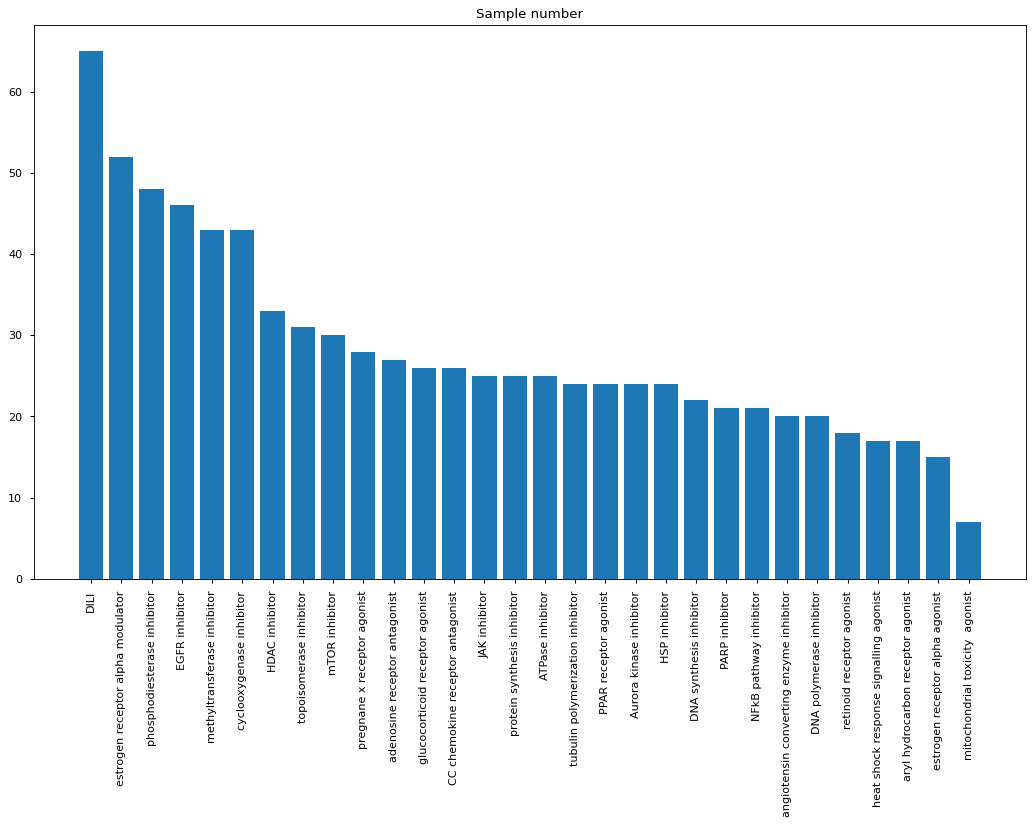

In [17]:
figure(figsize=(16, 9), dpi=80)

plt.bar(mech_df.loc["mech"], mech_df.loc["size"])
plt.xticks(rotation = 90)
plt.title("Sample number")
plt.show()

In [18]:
for i in range(len(mech_lst)):
    print(mech_lst[i], sample_size[i])

estrogen receptor alpha modulator 52
DILI 65
angiotensin converting enzyme inhibitor 20
adenosine receptor antagonist 27
cyclooxygenase inhibitor 43
DNA synthesis inhibitor 22
CC chemokine receptor antagonist 26
DNA polymerase inhibitor 20
EGFR inhibitor 46
glucocorticoid receptor agonist 26
pregnane x receptor agonist 28
estrogen receptor alpha agonist 15
aryl hydrocarbon receptor agonist 17
heat shock response signalling agonist 17
mitochondrial toxicity  agonist 7
Aurora kinase inhibitor 24
ATPase inhibitor 25
HSP inhibitor 24
HDAC inhibitor 33
JAK inhibitor 25
methyltransferase inhibitor 43
mTOR inhibitor 30
PARP inhibitor 21
phosphodiesterase inhibitor 48
NFkB pathway inhibitor 21
protein synthesis inhibitor 25
PPAR receptor agonist 24
tubulin polymerization inhibitor 24
retinoid receptor agonist 18
topoisomerase inhibitor 31


# Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import interp
from sklearn.model_selection import cross_val_score

def loo_eva(pipe, df):
    X, y = df.iloc[:,1:-2].values, df.iloc[:,-1].values                           # reading the dataset, y is the label(control vs the mechanism)

    le = LabelEncoder()
    y = le.fit_transform(y)                                                       # convert the text label into 0 or 1
    
    loo = LeaveOneOut()
    kfold = loo.split(X, y)
    
    labels = []
    preds  = []
    
    for k, (train, valid) in enumerate(kfold):
        pipe.fit(X[train], y[train])
        preds.append(pipe.predict(X[valid]))
        labels.append(y[valid])

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    fpr, tpr, threshold = roc_curve(labels, preds)
    roc_auc = auc(fpr, tpr)
    
    return acc, f1, precision, recall, fpr, tpr, roc_auc

# random negative sampling appraoch
def gen_df(df, mech, multi=4):
    df_mech = df.loc[mech]
    except_mech = [x for i,x in enumerate(mech_lst) if x!=mech]                    # select data that are not the selected mechanism, use them as control
    df_cont = df.loc[except_mech]
    
    df_mech['selected_mechanism']=['mech']*len(df_mech) # add label
    df_cont['selected_mechanism']=['cont']*len(df_cont) # add label
    
    df_concat = pd.concat([df_mech, df_cont.sample(n=len(df_mech)*multi)], axis=0) # concat 2 dataframe together to form the training dataset
    df_concat.reset_index(drop=True, inplace=True)                                 # reset all index from the oringinal datset
    return df_concat

# fixed negative approach (only inactive data from specs database)
def concat_inactive(df_mech):
    df_concat = pd.concat([df, df_inactive], axis=0)
    return df_concat

# appraoch 1(random negative sampling appraoch)
def mech_vs_other(mech_lst, pipe):
    acc_lst = []
    f1_lst = []
    pre_lst = []
    rec_lst = []
    auc_lst = []
    fpr_lst = []
    tpr_lst = []
    
    print(f'{"mech":40} : {"accuracy":3}  {"f1 score":3}  {"AUC":3}')
    
    # separated mechanism
    for mech in mech_lst:
        df_train = gen_df(df, mech)
        acc, f1, pre, rec, fpr, tpr, roc_auc = loo_eva(pipe, df_train)
        
        print(f'{mech:>40} : {acc:.3f} {f1:.3f} {roc_auc:.3f}')
    
        acc_lst.append(acc)
        f1_lst.append(f1)
        pre_lst.append(pre)
        rec_lst.append(rec)
        auc_lst.append(roc_auc)
        fpr_lst.append(fpr)
        tpr_lst.append(tpr)
    
    print(f'Average accuracy:{np.mean(acc_lst):.3f}, Average f1 score: {np.mean(f1_lst):.3f},  Average AUC: {np.mean(auc_lst):.3f}')

    stat_1 = pd.DataFrame([mech_lst, acc_lst, f1_lst, pre_lst, rec_lst, fpr_lst, tpr_lst, auc_lst], 
                          index=['mech', 'accuracy_1', 'f1_score_1', 'precision_1', 'recall_1', 'fpr_1', 'tpr_1', 'roc_auc_1'])
    return stat_1

def heat_inactive_vs_active(pipe, test_pct=0.3):
    X, y = df_heat.iloc[:,0:-1].values, df_heat.iloc[:,-1].values                           # reading the dataset, y is the label(control vs the mechanism)

    le = LabelEncoder()
    y = le.fit_transform(y)                                                                 # convert the text label into 0 or 1
    
    loo = LeaveOneOut()
    kfold = loo.split(X, y)
    
    labels = []
    preds  = []
    
    for k, (train, valid) in enumerate(kfold):
        pipe.fit(X[train], y[train])
        preds.append(pipe.predict(X[valid]))
        labels.append(y[valid])
    
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    fpr, tpr, threshold = roc_curve(labels, preds)
    roc_auc = auc(fpr, tpr)
    
    lst = ["heat shock response vs inactive", acc, f1, precision, recall, fpr, tpr, roc_auc]
    
    return pd.DataFrame(lst, index=['mech', 'accuracy_1', 'f1_score_1', 'precision_1', 'recall_1', 'fpr_1', 'tpr_1', 'roc_auc_1'])

## Logistic regression

- https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
- https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=10),
                        lr)

In [21]:
print("mech vs other mech")
print('Logistic regression')

lr_stat = mech_vs_other(mech_lst_sub, pipe_lr)

mech vs other mech
Logistic regression
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.906 0.778 0.875
             pregnane x receptor agonist : 0.829 0.538 0.705
         estrogen receptor alpha agonist : 0.907 0.774 0.867
       aryl hydrocarbon receptor agonist : 0.882 0.706 0.816
Average accuracy:0.881, Average f1 score: 0.699,  Average AUC: 0.816


In [22]:
lr_stat = pd.concat([lr_stat, heat_inactive_vs_active(pipe_lr)], axis=1)

In [23]:
lr_stat

,0,1,2,3,0
mech,heat shock response signalling agonist,pregnane x receptor agonist,estrogen receptor alpha agonist,aryl hydrocarbon receptor agonist,heat shock response vs inactive
accuracy_1,0.905882,0.828571,0.906667,0.882353,1.0
f1_score_1,0.777778,0.538462,0.774194,0.705882,1.0
precision_1,0.736842,0.583333,0.75,0.705882,1.0
recall_1,0.823529,0.5,0.8,0.705882,1.0
fpr_1,"[0.0, 0.07352941176470588, 1.0]","[0.0, 0.08928571428571429, 1.0]","[0.0, 0.06666666666666667, 1.0]","[0.0, 0.07352941176470588, 1.0]","[0.0, 0.0, 1.0]"
tpr_1,"[0.0, 0.8235294117647058, 1.0]","[0.0, 0.5, 1.0]","[0.0, 0.8, 1.0]","[0.0, 0.7058823529411765, 1.0]","[0.0, 1.0, 1.0]"
roc_auc_1,0.875,0.705357,0.866667,0.816176,1.0


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree don't need standardization
dt = DecisionTreeClassifier(max_depth=2,
                            criterion='entropy')

In [25]:
print("mech vs other mech")
print('Decision Tree')

dt_stat = mech_vs_other(mech_lst_sub, dt)

mech vs other mech
Decision Tree
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.753 0.160 0.515
             pregnane x receptor agonist : 0.807 0.585 0.759
         estrogen receptor alpha agonist : 0.920 0.786 0.850
       aryl hydrocarbon receptor agonist : 0.871 0.718 0.853
Average accuracy:0.838, Average f1 score: 0.562,  Average AUC: 0.744


In [26]:
dt_stat = pd.concat([dt_stat, heat_inactive_vs_active(dt)], axis=1)

## Random Tree Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                                     n_estimators = 100,
                                     n_jobs = 2)

In [28]:
print("mech vs other mech")
print('Random Tree Forest')

rf_stat = mech_vs_other(mech_lst_sub, rf)

mech vs other mech
Random Tree Forest
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.882 0.688 0.794
             pregnane x receptor agonist : 0.893 0.717 0.812
         estrogen receptor alpha agonist : 0.933 0.828 0.883
       aryl hydrocarbon receptor agonist : 0.906 0.765 0.853
Average accuracy:0.904, Average f1 score: 0.749,  Average AUC: 0.836


In [29]:
rf_stat = pd.concat([rf_stat, heat_inactive_vs_active(rf)], axis=1)

## K Neighest neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')
pipe_knn = make_pipeline(StandardScaler(),
                    knn)

In [31]:
print("mech vs other mech")
print('K Neighest neighbour')

knn_stat = mech_vs_other(mech_lst_sub, pipe_knn)

mech vs other mech
K Neighest neighbour
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.765 0.333 0.588
             pregnane x receptor agonist : 0.814 0.581 0.750
         estrogen receptor alpha agonist : 0.867 0.643 0.767
       aryl hydrocarbon receptor agonist : 0.988 0.971 0.993
Average accuracy:0.858, Average f1 score: 0.632,  Average AUC: 0.774


In [32]:
knn_stat = pd.concat([knn_stat, heat_inactive_vs_active(pipe_knn)], axis=1)

## Support vector machine

In [33]:
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         #PCA(n_components=10),
                         SVC())

In [34]:
print("mech vs other mech")
print('Support Vector machine')

svc_stat = mech_vs_other(mech_lst_sub, pipe_svc)

mech vs other mech
Support Vector machine
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.788 0.000 0.493
             pregnane x receptor agonist : 0.821 0.390 0.621
         estrogen receptor alpha agonist : 0.840 0.333 0.600
       aryl hydrocarbon receptor agonist : 0.800 0.000 0.500
Average accuracy:0.812, Average f1 score: 0.181,  Average AUC: 0.553


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
svc_stat = pd.concat([svc_stat, heat_inactive_vs_active(pipe_svc)], axis=1)

## XGBoost

- https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

In [36]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic")

pipe_xgb = make_pipeline(StandardScaler(),
                         #PCA(n_components=10),
                         xgb_model)

In [37]:
print("mech vs other mech")
print('XGBoost')

xgb_stat = mech_vs_other(mech_lst_sub, pipe_xgb)

mech vs other mech
XGBoost
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.882 0.706 0.816
             pregnane x receptor agonist : 0.886 0.692 0.795
         estrogen receptor alpha agonist : 0.853 0.645 0.783
       aryl hydrocarbon receptor agonist : 0.882 0.706 0.816
Average accuracy:0.876, Average f1 score: 0.687,  Average AUC: 0.803


In [38]:
xgb_stat = pd.concat([xgb_stat, heat_inactive_vs_active(pipe_xgb)], axis=1)

## Ensemble method

In [39]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr', pipe_lr), ('dt', dt), ('rf', rf),('knn', pipe_knn), ('svc', pipe_svc), ('xgb', pipe_xgb)]
ensemble = VotingClassifier(estimators, 
                            voting='hard',
                            weights=[1, 1, 1, 1, 1, 1])

In [40]:
print("mech vs other mech")
print('Ensemble learning')

ens_stat = mech_vs_other(mech_lst_sub, ensemble)

mech vs other mech
Ensemble learning
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.741 0.154 0.507
             pregnane x receptor agonist : 0.850 0.533 0.692
         estrogen receptor alpha agonist : 0.907 0.741 0.817
       aryl hydrocarbon receptor agonist : 0.965 0.914 0.956
Average accuracy:0.866, Average f1 score: 0.586,  Average AUC: 0.743


In [41]:
ens_stat = pd.concat([ens_stat, heat_inactive_vs_active(ensemble)], axis=1)

## MLP

In [42]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

pipe_mlp = make_pipeline(StandardScaler(),
                         #PCA(n_components=10),
                         mlp_model)

In [43]:
print("mech vs other mech")
print('MLP')

mlp_stat = mech_vs_other(mech_lst_sub, pipe_mlp)

mech vs other mech
MLP
mech                                     : accuracy  f1 score  AUC
  heat shock response signalling agonist : 0.953 0.882 0.926
             pregnane x receptor agonist : 0.914 0.800 0.893
         estrogen receptor alpha agonist : 0.840 0.600 0.750
       aryl hydrocarbon receptor agonist : 0.941 0.865 0.941
Average accuracy:0.912, Average f1 score: 0.787,  Average AUC: 0.878


In [44]:
mlp_stat = pd.concat([mlp_stat, heat_inactive_vs_active(pipe_mlp)], axis=1)

# Comparing different methods

- Why svm does not perform well in our data set
    - https://www.quora.com/When-does-the-logistic-regression-perform-better-than-a-linear-SVM

In [45]:
lr_stat  = lr_stat.T.reset_index(drop=True).T
dt_stat  = dt_stat.T.reset_index(drop=True).T
rf_stat  = rf_stat.T.reset_index(drop=True).T
knn_stat = knn_stat.T.reset_index(drop=True).T
svc_stat = svc_stat.T.reset_index(drop=True).T
xgb_stat = xgb_stat.T.reset_index(drop=True).T
ens_stat = ens_stat.T.reset_index(drop=True).T
mlp_stat = mlp_stat.T.reset_index(drop=True).T

In [46]:
all_stat_index = ['mech', 'accuracy_lr',  'f1_score_lr',   'precision_lr',  'recall_lr',  'fpr_lr',  'tpr_lr',  'roc_auc_lr', 
                  '-',    'accuracy_dt',  'f1_score_dt',   'precision_dt',  'recall_dt',  'fpr_dt',  'tpr_dt',  'roc_auc_dt', 
                  '-',    'accuracy_rf',  'f1_score_rf',   'precision_rf',  'recall_rf',  'fpr_rf',  'tpr_rf',  'roc_auc_rf', 
                  '-',    'accuracy_knn', 'f1_score_knn',  'precision_knn', 'recall_knn', 'fpr_knn', 'tpr_knn', 'roc_auc_knn', 
                  '-',    'accuracy_svc', 'f1_score_svc',  'precision_svc', 'recall_svc', 'fpr_svc', 'tpr_svc', 'roc_auc_svc', 
                  '-',    'accuracy_xgb', 'f1_score_xgb',  'precision_xgb', 'recall_xgb', 'fpr_xgb', 'tpr_xgb', 'roc_auc_xgb', 
                  '-',    'accuracy_ens', 'f1_score_ens',  'precision_ens', 'recall_ens', 'fpr_ens', 'tpr_ens', 'roc_auc_ens', 
                  '-',    'accuracy_mlp', 'f1_score_mlp',  'precision_mlp', 'recall_mlp', 'fpr_mlp', 'tpr_mlp', 'roc_auc_mlp']

all_stat = (pd.concat([lr_stat, dt_stat, rf_stat, knn_stat, svc_stat, xgb_stat, ens_stat, mlp_stat], axis=0)).reset_index(drop=True)
all_stat.set_axis(all_stat_index, axis=0, inplace=True)

### ROC

heat shock response signalling agonist


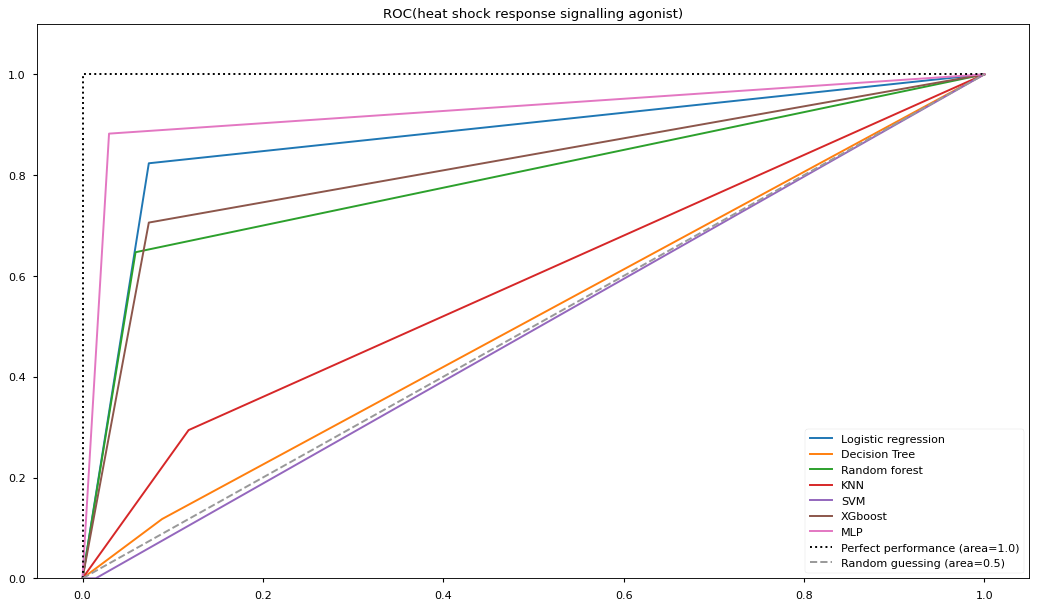

In [47]:
figure(figsize=(16, 9), dpi=80)

i = 0
print(all_stat[i]['mech'])

plt.title('ROC(heat shock response signalling agonist)')
plt.plot(all_stat[i]['fpr_lr'], all_stat[i]['tpr_lr'], label='Logistic regression')
plt.plot(all_stat[i]['fpr_dt'], all_stat[i]['tpr_dt'], label='Decision Tree')
plt.plot(all_stat[i]['fpr_rf'], all_stat[i]['tpr_rf'], label='Random forest')
plt.plot(all_stat[i]['fpr_knn'], all_stat[i]['tpr_knn'], label='KNN')
plt.plot(all_stat[i]['fpr_svc'], all_stat[i]['tpr_svc'], label='SVM')
plt.plot(all_stat[i]['fpr_xgb'], all_stat[i]['tpr_xgb'], label='XGboost')
#plt.plot(all_stat[i]['fpr_ens'], all_stat[i]['tpr_ens'], label='Ensemble')
plt.plot(all_stat[i]['fpr_mlp'], all_stat[i]['tpr_mlp'], label='MLP')

plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance (area=1.0)')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing (area=0.5)')
plt.legend(loc='lower right')
plt.ylim((0,1.1))
plt.show()

In [52]:
all_stat = all_stat.sort_values(by = "f1_score_ens", axis=1, ascending = False)

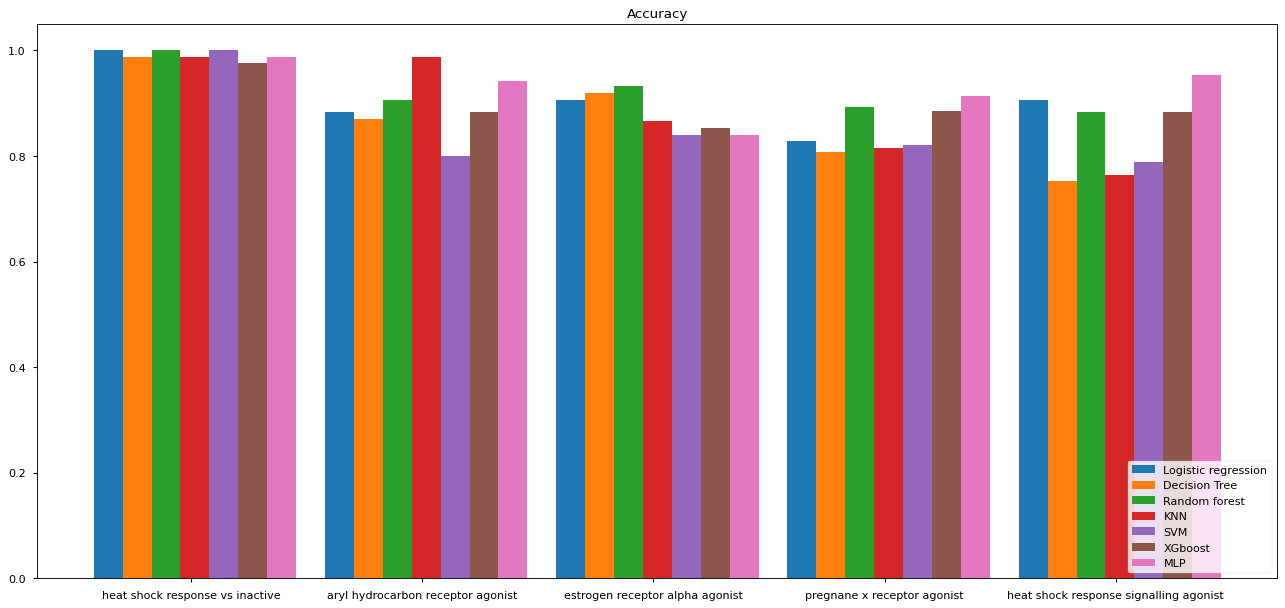

In [56]:
figure(figsize=(20, 9), dpi=80)
X = np.arange(5)
labels = all_stat.loc['mech']
width = 1/8


plt.title("Accuracy")
plt.bar(X+(width*0), all_stat.loc['accuracy_lr'], width, label="Logistic regression")
plt.bar(X+(width*1), all_stat.loc['accuracy_dt'], width, label="Decision Tree")
plt.bar(X+(width*2), all_stat.loc['accuracy_rf'], width, label="Random forest")
plt.bar(X+(width*3), all_stat.loc['accuracy_knn'], width, label="KNN")
plt.bar(X+(width*4), all_stat.loc['accuracy_svc'], width, label="SVM")
plt.bar(X+(width*5), all_stat.loc['accuracy_xgb'], width, label="XGboost")
plt.bar(X+(width*6), all_stat.loc['accuracy_mlp'], width, label="MLP")
#plt.bar(X+(width*7), all_stat.loc['accuracy_ens'], width, label="Ensemble")
plt.xticks(X+(2.5/7), labels, rotation=0)
plt.legend(loc='lower right')

plt.show()

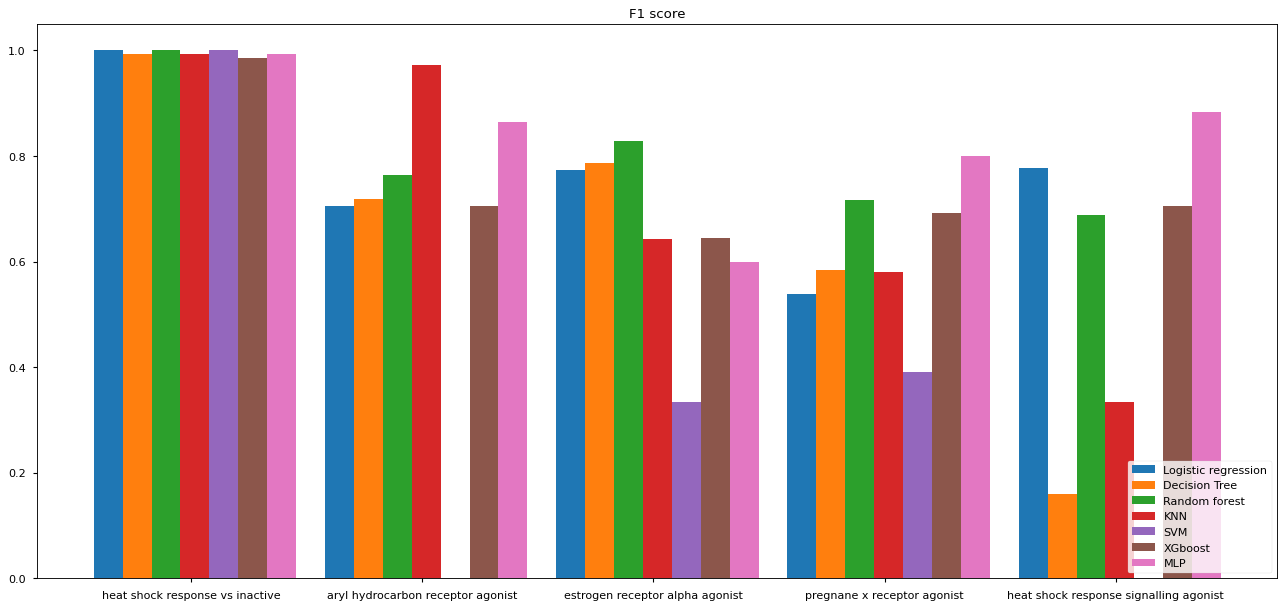

In [57]:
figure(figsize=(20, 9), dpi=80)
X = np.arange(5)
labels = all_stat.loc['mech']

plt.title("F1 score")
plt.bar(X+(width*0), all_stat.loc['f1_score_lr'], width, label="Logistic regression")
plt.bar(X+(width*1), all_stat.loc['f1_score_dt'], width, label="Decision Tree")
plt.bar(X+(width*2), all_stat.loc['f1_score_rf'], width, label="Random forest")
plt.bar(X+(width*3), all_stat.loc['f1_score_knn'], width, label="KNN")
plt.bar(X+(width*4), all_stat.loc['f1_score_svc'], width, label="SVM")
plt.bar(X+(width*5), all_stat.loc['f1_score_xgb'], width, label="XGboost")
plt.bar(X+(width*6), all_stat.loc['f1_score_mlp'], width, label="MLP")
#plt.bar(X+(width*7), all_stat.loc['f1_score_ens'], width, label="Ensemble")
plt.xticks(X+(2.5/7), labels, rotation=0)
plt.legend(loc='lower right')

plt.show()

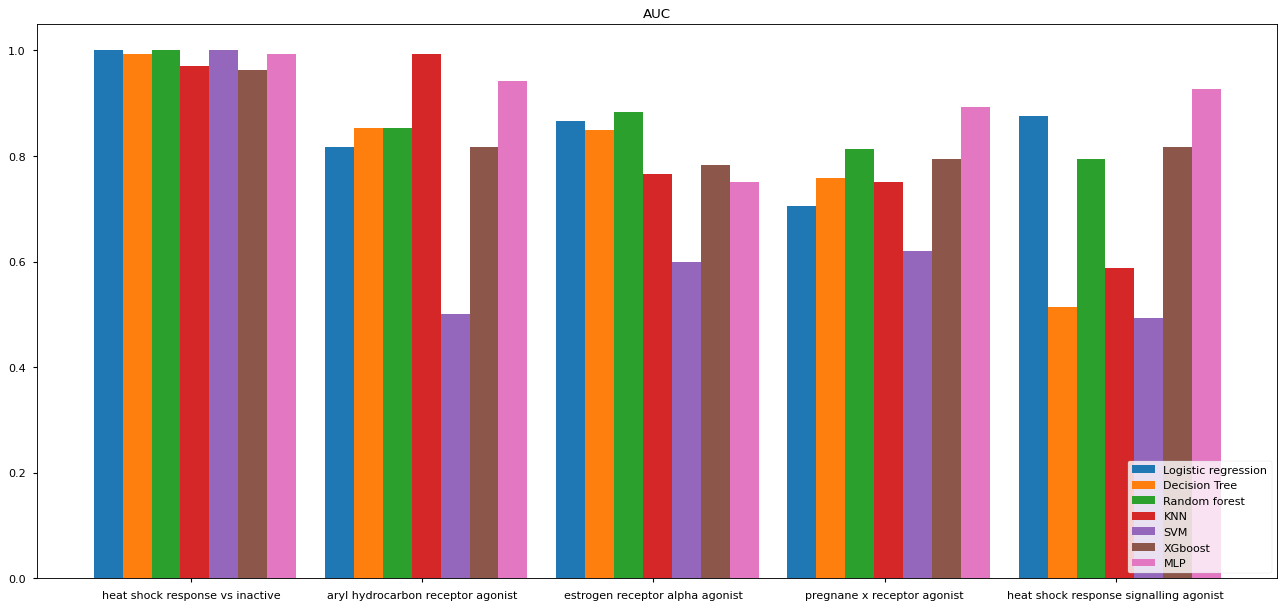

In [58]:
figure(figsize=(20, 9), dpi=80)
X = np.arange(5)
labels = all_stat.loc['mech']

plt.title("AUC")
plt.bar(X+(width*0), all_stat.loc['roc_auc_lr'], width, label="Logistic regression")
plt.bar(X+(width*1), all_stat.loc['roc_auc_dt'], width, label="Decision Tree")
plt.bar(X+(width*2), all_stat.loc['roc_auc_rf'], width, label="Random forest")
plt.bar(X+(width*3), all_stat.loc['roc_auc_knn'], width, label="KNN")
plt.bar(X+(width*4), all_stat.loc['roc_auc_svc'], width, label="SVM")
plt.bar(X+(width*5), all_stat.loc['roc_auc_xgb'], width, label="XGboost")
plt.bar(X+(width*6), all_stat.loc['roc_auc_mlp'], width, label="MLP")
#plt.bar(X+(width*7), all_stat.loc['roc_auc_ens'], width, label="Ensemble")
plt.xticks(X+(2.5/7), labels, rotation=0)
plt.legend(loc='lower right')

plt.show()

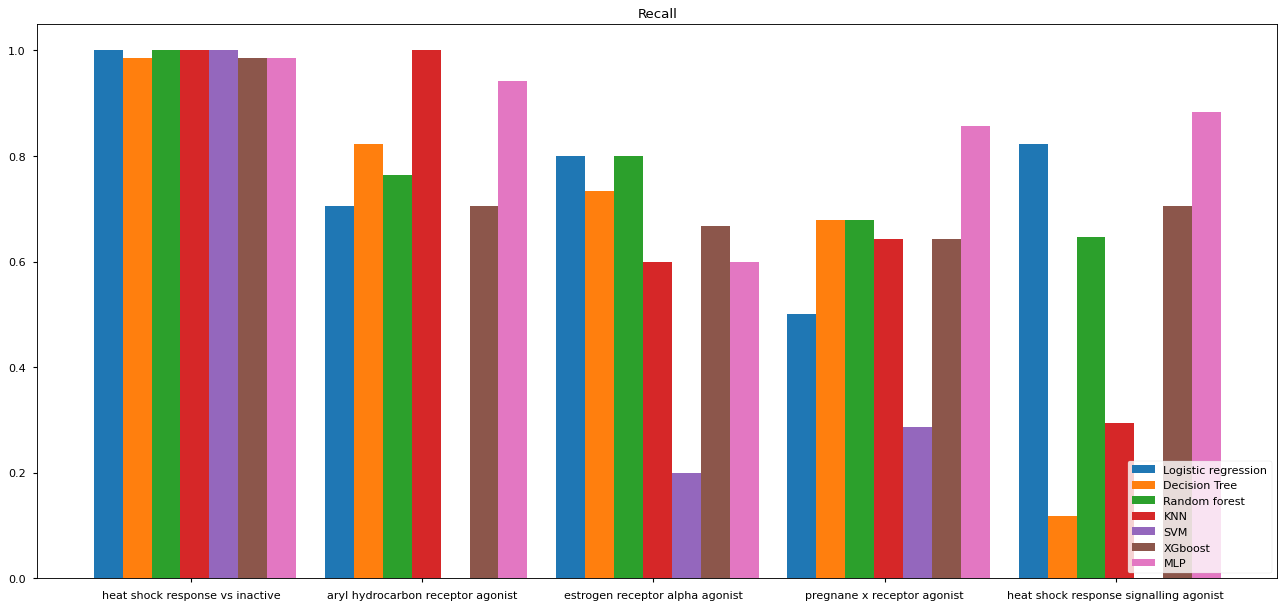

In [59]:
figure(figsize=(20, 9), dpi=80)
X = np.arange(5)
labels = all_stat.loc['mech']

plt.title("Recall")
plt.bar(X+(width*0), all_stat.loc['recall_lr'], width, label="Logistic regression")
plt.bar(X+(width*1), all_stat.loc['recall_dt'], width, label="Decision Tree")
plt.bar(X+(width*2), all_stat.loc['recall_rf'], width, label="Random forest")
plt.bar(X+(width*3), all_stat.loc['recall_knn'], width, label="KNN")
plt.bar(X+(width*4), all_stat.loc['recall_svc'], width, label="SVM")
plt.bar(X+(width*5), all_stat.loc['recall_xgb'], width, label="XGboost")
plt.bar(X+(width*6), all_stat.loc['recall_mlp'], width, label="MLP")
#plt.bar(X+(width*7), all_stat.loc['roc_auc_ens'], width, label="Ensemble")
plt.xticks(X+(2.5/7), labels, rotation=0)
plt.legend(loc='lower right')

plt.show()

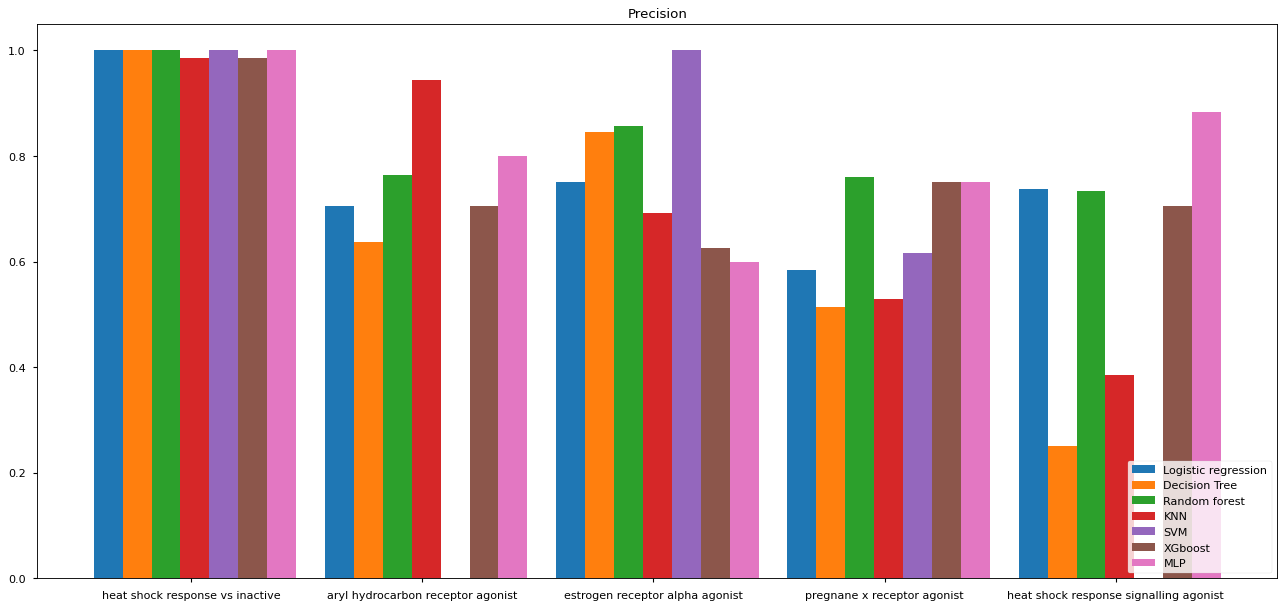

In [60]:
figure(figsize=(20, 9), dpi=80)
X = np.arange(5)
labels = all_stat.loc['mech']

plt.title("Precision")
plt.bar(X+(width*0), all_stat.loc['precision_lr'], width, label="Logistic regression")
plt.bar(X+(width*1), all_stat.loc['precision_dt'], width, label="Decision Tree")
plt.bar(X+(width*2), all_stat.loc['precision_rf'], width, label="Random forest")
plt.bar(X+(width*3), all_stat.loc['precision_knn'], width, label="KNN")
plt.bar(X+(width*4), all_stat.loc['precision_svc'], width, label="SVM")
plt.bar(X+(width*5), all_stat.loc['precision_xgb'], width, label="XGboost")
plt.bar(X+(width*6), all_stat.loc['precision_mlp'], width, label="MLP")
#plt.bar(X+(width*7), all_stat.loc['roc_auc_ens'], width, label="Ensemble")
plt.xticks(X+(2.5/7), labels, rotation=0)
plt.legend(loc='lower right')

plt.show()

In [72]:
all_stat

,4,3,2,1,0
mech,heat shock response vs inactive,aryl hydrocarbon receptor agonist,estrogen receptor alpha agonist,pregnane x receptor agonist,heat shock response signalling agonist
accuracy_lr,1.0,0.882353,0.906667,0.828571,0.905882
f1_score_lr,1.0,0.705882,0.774194,0.538462,0.777778
precision_lr,1.0,0.705882,0.75,0.583333,0.736842
recall_lr,1.0,0.705882,0.8,0.5,0.823529
...,...,...,...,...,...
precision_mlp,1.0,0.8,0.6,0.75,0.882353
recall_mlp,0.985075,0.941176,0.6,0.857143,0.882353
fpr_mlp,"[0.0, 0.0, 1.0]","[0.0, 0.058823529411764705, 1.0]","[0.0, 0.1, 1.0]","[0.0, 0.07142857142857142, 1.0]","[0.0, 0.029411764705882353, 1.0]"
tpr_mlp,"[0.0, 0.9850746268656716, 1.0]","[0.0, 0.9411764705882353, 1.0]","[0.0, 0.6, 1.0]","[0.0, 0.8571428571428571, 1.0]","[0.0, 0.8823529411764706, 1.0]"


In [89]:
all_stat.loc["roc_auc_mlp"]

4    0.992537
3    0.941176
2        0.75
1    0.892857
0    0.926471
Name: roc_auc_mlp, dtype: object

# Conformal prediction

https://towardsdatascience.com/how-to-add-uncertainty-estimation-to-your-models-with-conformal-prediction-a5acdb86ea05

In [61]:
# Import the required packages
import sys
sys.path.append('src')
import numpy as np
from nonconformist.cp import IcpClassifier, TcpClassifier,IcpRegressor
from nonconformist.nc import ClassifierNc, MarginErrFunc, ClassifierAdapter, RegressorNc, AbsErrorErrFunc

from pharmbio.cp import metrics
from pharmbio.cp import plotting # this import causes seaborn style be set if available on the path
import matplotlib.pyplot as plt
import seaborn as sns


# Set the figure size to re-use so it fits the screen OK
fig_size = (14,7)
# Set a different context, default is "notebook" - so that all fonts are enlarged
#sns.set_context("talk")

### heat shock

In [62]:
gen_df(df, "pregnane x receptor agonist")

,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Site,Count_nuclei,selected_mechanism
0,80.383893,4.981132,2557.091511,3611.804488,1091.322872,1105.807540,1031.166264,1045.404526,1060.734072,1075.078788,...,-0.004830,0.046699,-0.024385,0.013339,-0.045595,-0.002812,-0.021458,4.981132,145.283019,mech
1,84.225545,4.816327,2560.348340,3613.459425,1109.833989,1090.448533,1049.753718,1030.053069,1079.312703,1059.735169,...,0.040201,0.015372,0.003460,0.017130,-0.032274,-0.021340,0.039283,4.816327,153.326531,mech
2,59.482315,5.080000,2148.622223,3052.007775,1103.281659,1148.388961,1049.289451,1093.945980,1075.805366,1120.617702,...,0.058962,-0.026380,-0.025322,-0.010009,-0.007677,-0.003294,-0.001760,5.080000,100.900000,mech
3,92.696631,4.960000,2466.402699,3482.292264,1110.887076,1104.038583,1051.935837,1044.708967,1080.917869,1073.837462,...,-0.041405,0.002963,-0.012366,0.002217,-0.015718,0.041685,0.011180,4.960000,167.820000,mech
4,89.678397,5.023810,2502.452033,3527.686141,1120.246859,1096.399479,1060.664647,1036.868201,1089.978607,1066.121452,...,0.029539,0.057502,0.037132,0.044570,0.004974,-0.040291,-0.035328,5.023810,161.452381,mech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,81.229504,5.162791,2528.913428,3558.490763,1115.669870,1091.950291,1055.758558,1032.283450,1085.225794,1061.588678,...,0.005512,0.048098,0.005395,-0.007282,0.012441,-0.005167,-0.030748,5.162791,146.860465,cont
136,7.703651,4.891892,1285.894557,1962.658938,1132.130145,1105.128355,1089.486069,1060.979725,1110.127216,1082.501051,...,0.041741,0.081573,-0.134185,0.208266,0.073223,-0.003325,-0.170869,4.891892,0.162162,cont
137,59.579310,5.075472,2638.558892,3735.072255,1086.240786,1112.230630,1024.826134,1051.035411,1055.066268,1081.114729,...,0.006718,0.041690,-0.021738,0.009751,0.006650,-0.054763,-0.048672,5.075472,107.962264,cont
138,79.861593,4.924528,2509.093477,3570.915890,1093.939329,1129.222465,1034.454525,1069.188522,1063.704969,1098.661887,...,-0.027145,0.009925,0.030214,0.033385,-0.006779,0.020687,-0.038354,4.924528,144.056604,cont


### ICP

In [63]:
X, y = df_heat.iloc[:,0:-1].values, df_heat.iloc[:,-1].values                           # reading the dataset, y is the label(control vs the mechanism)

le = LabelEncoder()
y = le.fit_transform(y)                                                                 # convert the text label into 0 or 1
    
loo = LeaveOneOut()
kfold = loo.split(X, y)
    
labels  = []
preds   = [[0,0]]
pvalues = [[0,0]]

icp = IcpClassifier(ClassifierNc(ClassifierAdapter(pipe_mlp), MarginErrFunc()))

for k, (train, valid) in enumerate(kfold):
    X_train, X_calib, y_train, y_calib = train_test_split(X[train], y[train], test_size=0.2, stratify=y[train])
    
    # Train the ICP
    icp.fit(X_train, y_train) # First train the underlying model
    icp.calibrate(X_calib,y_calib) # Calibrate the ICP

    pred = icp.predict(X[valid], significance=.05) # i.e. 95% confidence - we get a matrix for the included classes
    pvalue = icp.predict(X[valid]) # Or no significance - get the raw p-values

    pvalues = pvalues+ list(pvalue)
    preds = preds + list(pred)
    labels.append(int(y[valid]))

pvalues = pvalues[1:]
preds = preds[1:]

In [64]:
obs_fuzz = metrics.obs_fuzziness(labels,pvalues)
print("Observed fuzziness: %.3f" % obs_fuzz)

CM = metrics.confusion_matrix(labels, pvalues, sign=0.2, labels=le.inverse_transform(np.unique(y)))
print('Confusion matrix using significance \u03B5=0.2\n')
CM

Observed fuzziness: 0.029
Confusion matrix using significance ε=0.2



,active,inactive
active,13,0
inactive,0,56
Empty,4,11
Both,0,0


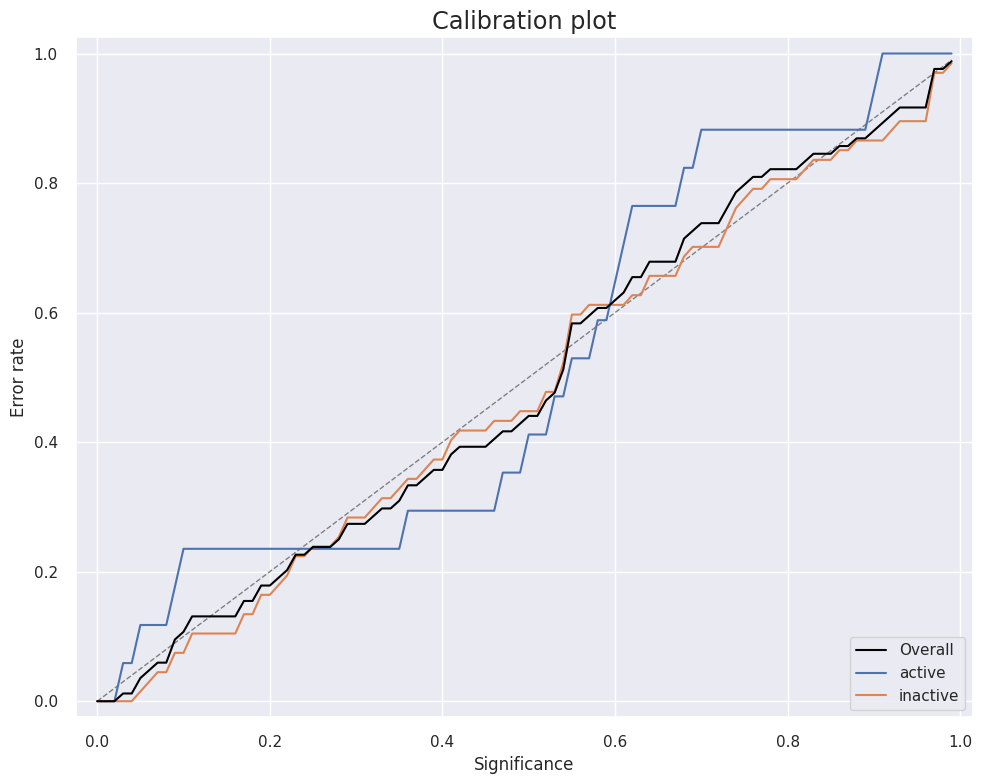

In [65]:
# Perhaps most important, the calibration plot:
calib_fig = plotting.plot_calibration_curve(labels, 
                                            pvalues, 
                                            title='Calibration plot',
                                            labels=le.inverse_transform(np.unique(y)),
                                            figsize=None)
plt.show()

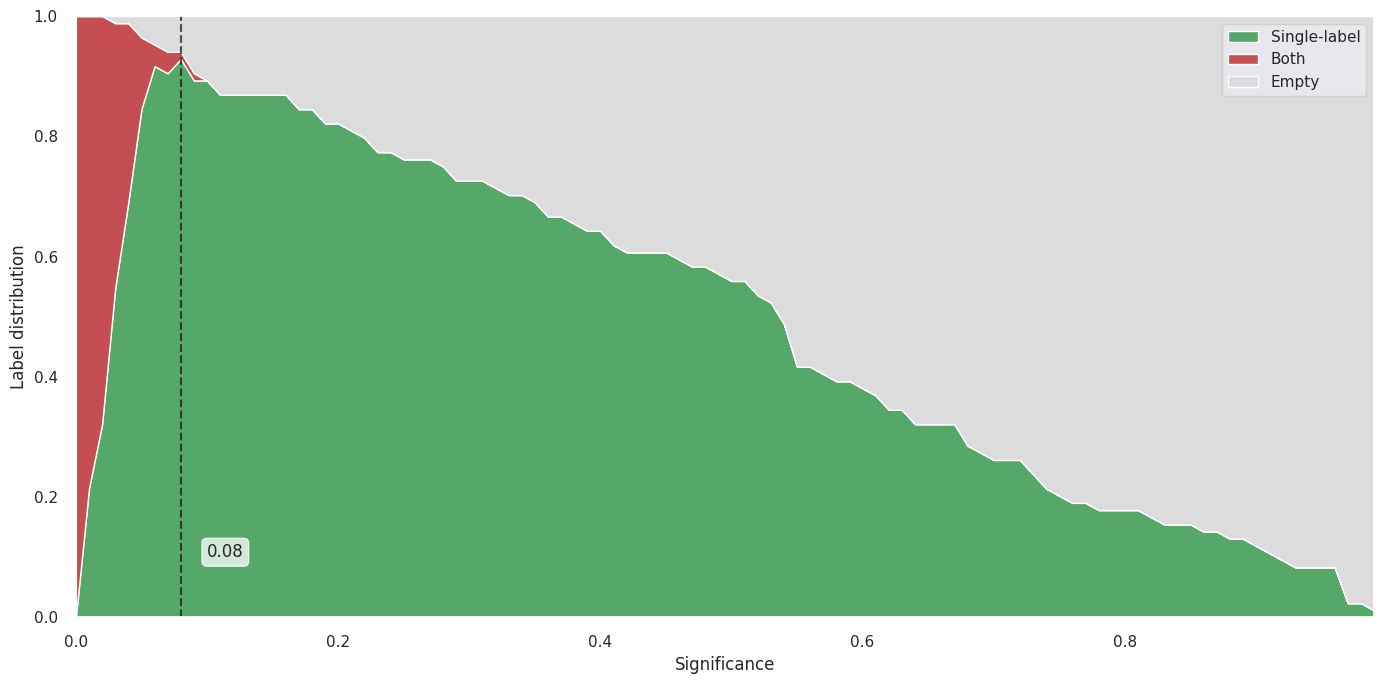

In [66]:
label_distr_fig = plotting.plot_label_distribution(labels,
                                                   pvalues,
                                                   sign_vals=np.arange(0,1,0.01),
                                                   mark_best=True,
                                                   display_incorrects=False,
                                                   figsize = fig_size)

plt.show()

### TCP

In [92]:
# took around 20 mins to run

X, y = df_heat.iloc[:,0:-1].values, df_heat.iloc[:,-1].values                           # reading the dataset, y is the label(control vs the mechanism)

le = LabelEncoder()
y = le.fit_transform(y)                                                                 # convert the text label into 0 or 1
    
loo = LeaveOneOut()
kfold = loo.split(X, y)
    
labels  = []
preds   = [[0,0]]
pvalues = [[0,0]]

tcp = TcpClassifier(ClassifierNc(ClassifierAdapter(pipe_mlp), MarginErrFunc()))

for k, (train, valid) in enumerate(kfold):
    # Train the ICP
    tcp.fit(X[train], y[train]) # First train the underlying model

    pred = tcp.predict(X[valid], significance=.05) # i.e. 95% confidence - we get a matrix for the included classes
    pvalue = tcp.predict(X[valid]) # Or no significance - get the raw p-values

    pvalues = pvalues+ list(pvalue)
    preds = preds + list(pred)
    labels.append(int(y[valid]))

pvalues = pvalues[1:]
preds = preds[1:]

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


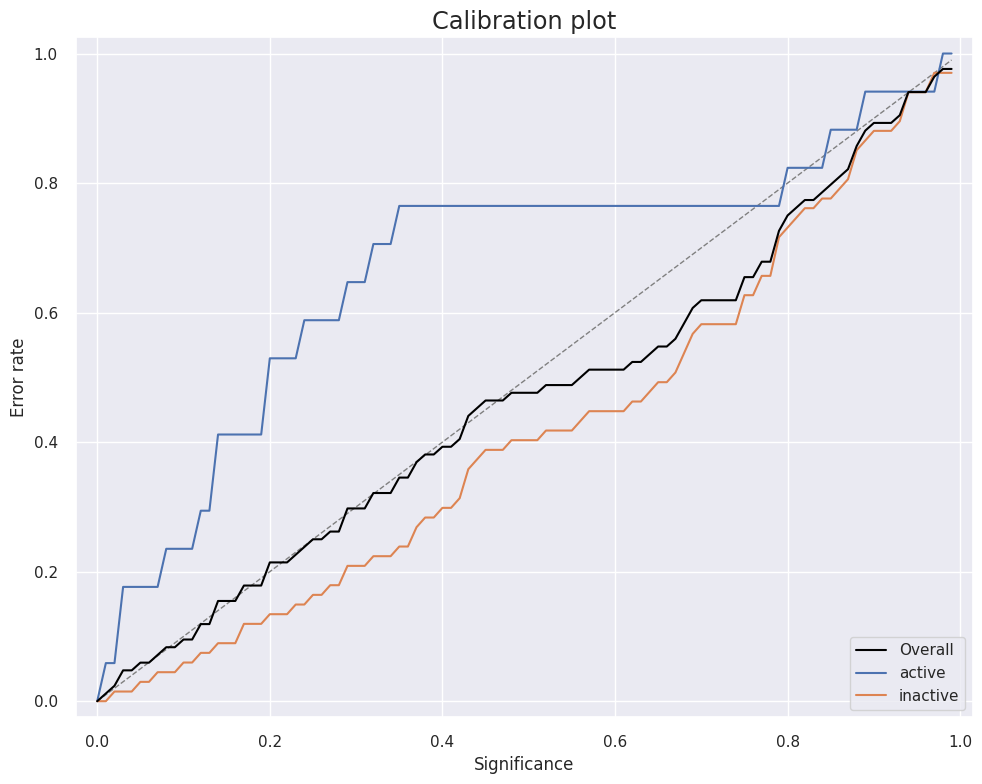

In [97]:
# Perhaps most important, the calibration plot:
calib_fig = plotting.plot_calibration_curve(labels, 
                                            pvalues, 
                                            title='Calibration plot',
                                            labels=le.inverse_transform(np.unique(y)),
                                            figsize=None)
plt.show()

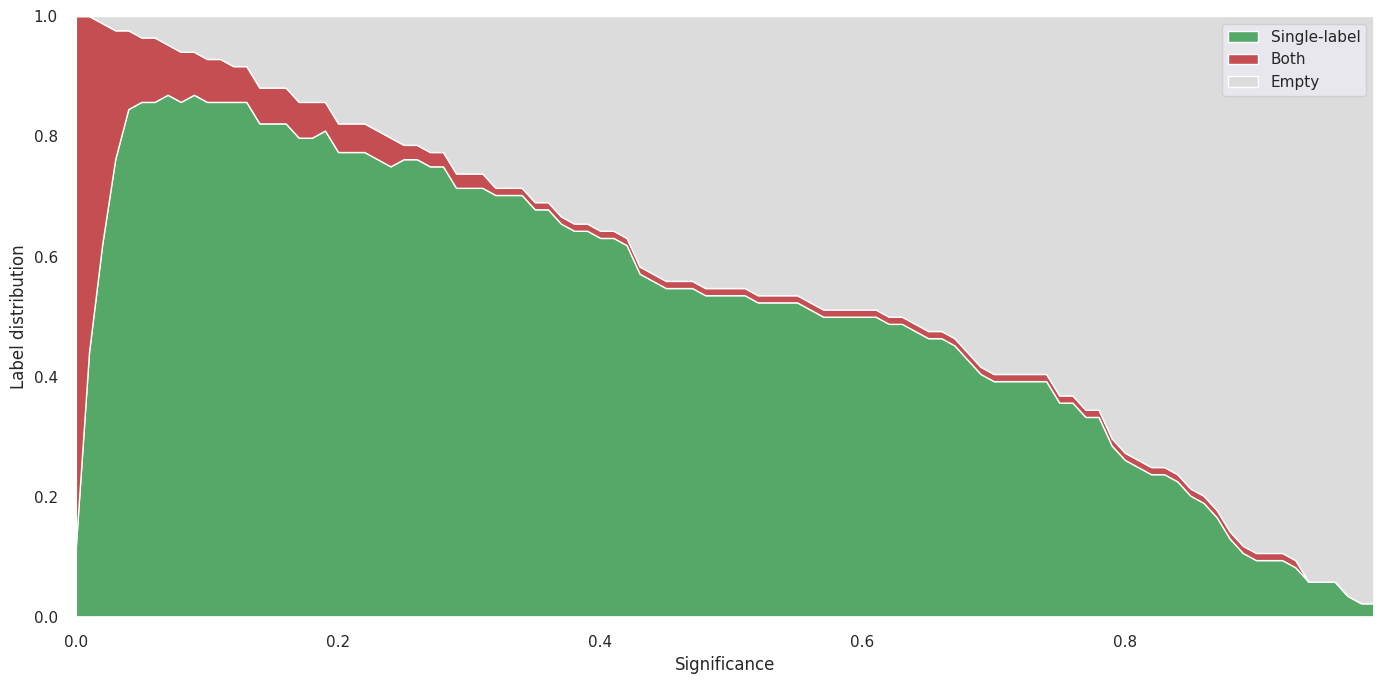

In [98]:
# Comparing the results from ICP and TCP can now be performed using e.g. the label distribution plot
label_distr_tcp_fig = plotting.plot_label_distribution(labels,
                                                       pvalues,
                                                       sign_vals=np.arange(0,1,0.01),
                                                       mark_best=False,
                                                       display_incorrects=False,
                                                       figsize=fig_size)
plt.show()